<a href="https://colab.research.google.com/github/omarja12/DS_Project2/blob/main/Project2_GroupD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2 - Classification
## Credit card default
### This notebook uses the dateset *default_credit_card_clients.xlsx*

(c) Nuno António 2022 - Rev. 1.0

## Dataset description

- **X1**: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- **X2**: Gender (1 = male; 2 = female). 
- **X3**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- **X4**: Marital status (1 = married; 2 = single; 3 = others). 
- **X5**: Age (year). 
- **X6** - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- **X12-X17**: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
- **X18-X23**: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.
- **Y**: Indication if the customer defaulted in the following month (0-no, 1-yes).

For additional information on the dataset check https://www.sciencedirect.com/science/article/abs/pii/S0957417407006719

## Work description

### Overview
<p>You should organize into groups of 3 to 5 students, where you will assume the role of a consultant. You are asked to develop a model to predict which customers are likely to default on their credit card in the following month. The bank wants to use the model the decrease operational losses.</p>
<p>Employing the CRISP-DM process model, you are expected to define, describe and explain the model built. Simultaneous, you should explain how your model can help the bank reaching its objectives.</p>

### Questions or additional informations
For any additional questions, don't hesitate to get in touch with the instructor. The instructor will also act as the bank business/project stakeholder.

## Defining the necessary functions.

In [805]:
# Function to create dataframe with metrics

def performanceMetricsDF(metricsObj, yTrain, yProbaPredTrain, yPredTrain, yTest, yProbaPredTest, yPredTest):
    measures_list = ['ACCURACY','PRECISION', 'RECALL','F1 SCORE','AUC', 'AUC_Proba']
    train_results = [metricsObj.accuracy_score(yTrain, yPredTrain),
                metricsObj.precision_score(yTrain, yPredTrain),
                metricsObj.recall_score(yTrain, yPredTrain),
                metricsObj.f1_score(yTrain, yPredTrain, average='weighted'),
                metricsObj.roc_auc_score(yTrain, yPredTrain),
                metricsObj.roc_auc_score(yTrain, yProbaPredTrain)     
                ]
    test_results = [metricsObj.accuracy_score(yTest, yPredTest),
               metricsObj.precision_score(yTest, yPredTest),
               metricsObj.recall_score(yTest, yPredTest),
               metricsObj.f1_score(yTest, yPredTest, average='weighted'),
               metricsObj.roc_auc_score(yTest, yPredTest),
               metricsObj.roc_auc_score(yTest, yProbaPredTest) 
               ]
    resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
    return(resultsDF)

In [806]:
# Function to plot confusion matrix - Adapted from https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=box_labels, fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)# From above we can see that our dataset does not contains any missing values.

In [807]:
# Function to find outliers on columns based on percentile
def removeOutliers(df, colList, lowPercentile=0.05, highPercentile=0.95, verbose=False):
    quant_df = df[colList].quantile([lowPercentile, highPercentile])
    if verbose:
        print(quant_df)
    for name in list(df[colList].columns):
        df = df[(df[name] >= quant_df.loc[lowPercentile, name]) & (df[name] <= quant_df.loc[highPercentile, name])]
    return df

## Initializations and data loading

In [808]:
!pip install category_encoders

In [809]:
# Loading packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import category_encoders as ce
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error

from imblearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

In [810]:
import requests as rq
from io import BytesIO

url = "https://raw.githubusercontent.com/omarja12/DS_Project2/main/default_credit_card_clients.xlsx"
data = rq.get(url).content
ds = pd.read_excel(BytesIO(data), engine='openpyxl')

In [811]:
# Loading the dataset and visualizing summary statistics
ds.describe(include='all').T

,count,unique,top,freq
Unnamed: 0,30001,30001,ID,1
X1,30001,82,50000,3365
X2,30001,3,2,18112
X3,30001,8,2,14030
X4,30001,5,2,15964
X5,30001,57,29,1605
X6,30001,12,0,14737
X7,30001,12,0,15730
X8,30001,12,0,15764
X9,30001,12,0,16455


In [812]:
# From above we can see that our dataset does not contains any missing values.

In [813]:
# Show top rows
ds.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [814]:
# Setting the first line to be the columns name.

ds.columns = ds.iloc[0]
ds = ds.drop(labels=0, axis=0)

In [815]:
ds.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [816]:
# We can see that our dataset does not contain any duplicates.

ds.duplicated().sum()

0

In [817]:
# Dropping the 'ID' column as it does not provide any informations.
ds.drop(columns=['ID'], inplace=True)

In [818]:
# Checking the type of the columns
ds.dtypes

0
LIMIT_BAL                     object
SEX                           object
EDUCATION                     object
MARRIAGE                      object
AGE                           object
PAY_0                         object
PAY_2                         object
PAY_3                         object
PAY_4                         object
PAY_5                         object
PAY_6                         object
BILL_AMT1                     object
BILL_AMT2                     object
BILL_AMT3                     object
BILL_AMT4                     object
BILL_AMT5                     object
BILL_AMT6                     object
PAY_AMT1                      object
PAY_AMT2                      object
PAY_AMT3                      object
PAY_AMT4                      object
PAY_AMT5                      object
PAY_AMT6                      object
default payment next month    object
dtype: object

In [819]:
ds = ds.astype(float)

In [820]:
ds.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [821]:
# Renaming the columns 'PAY_0' to 'PAY_1', and 'default payment next month' to 'TARGET'.

ds = ds.rename(columns={'PAY_0': 'PAY_1', 'default payment next month': 'TARGET'})

In [822]:
# The variables 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6' and the target 
# 'default payment next month' should be intergers.

lst=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
     'TARGET']

ds[lst]=ds[lst].astype(int)

In [823]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


# Data Exploration:

In [824]:
ds.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'TARGET'],
      dtype='object', name=0)

### The variable 'LIMIT_BAL':

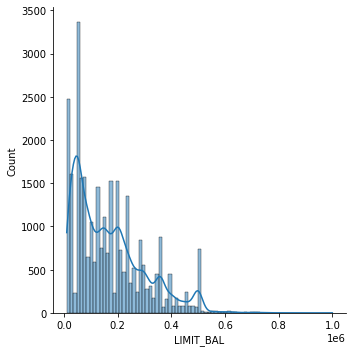

In [825]:
# Checking the histogram of the variable 'LIMIT_BAL'.

sns.displot(data=ds, x="LIMIT_BAL", kde=True)
plt.show()

In [826]:
# Calculating the skewness of the 'LIMIT_BAL' variable.
ds['LIMIT_BAL'].skew()

0.992866960519544

From the above plot we can see that the distribution of 'LIMIT_BAL' is right skewed, which is confirmed by the calculation above.

### The variable 'SEX':

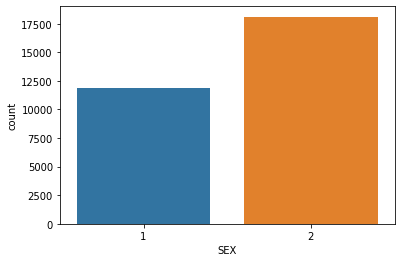

In [827]:
# Counting the genders in the dataset.

sns.countplot(data=ds, x="SEX")
plt.show()

From the plot above we can see that the dataset contains more females than males.

### The variable 'EDUCATION':

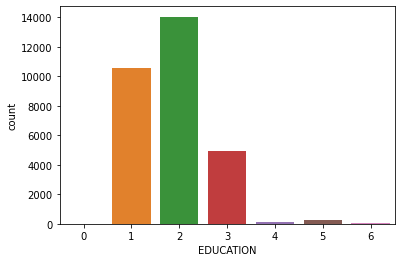

In [828]:
# Counting the EDUCATION categories in the dataset.

sns.countplot(data=ds, x="EDUCATION")
plt.show()

From the figure above we can see that the dataset contains other categories that the one specified in the description, meaning that we should deal with the unknown categories '0', '5' and '6'.

In [829]:
# Dropping the categories 0, 5 and 6

ds = ds[~ds['EDUCATION'].isin([0, 5, 6])]

In [830]:
ds['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      123
Name: EDUCATION, dtype: int64

We notice that most of the individuals in the dataset are university and high school graduates.

### The variable 'MARRIAGE':

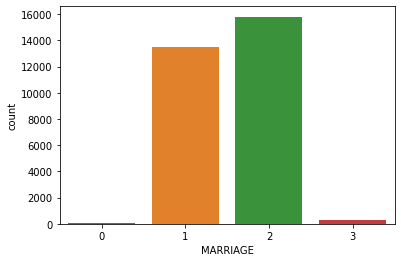

In [831]:
# Counting the 'MARRIAGE' in the dataset.

sns.countplot(data=ds, x="MARRIAGE")
plt.show()
# We need to drop the category 0.

Again we have an unknown category '0', we should drop it as we consider it to be noise.

In [832]:
ds = ds[~ds['MARRIAGE'].isin([0])]

In [833]:
ds['MARRIAGE'].value_counts()

2    15806
1    13477
3      318
Name: MARRIAGE, dtype: int64

Most of individuals in the dataset are single (15806), followed by the married ones (13477)

### The variable 'AGE':

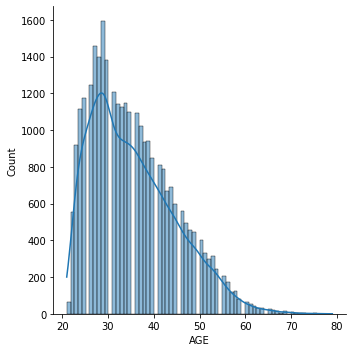

In [834]:
# Checking the histogram of the variable 'AGE'

sns.displot(data=ds, x="AGE", kde=True)
plt.show()

In [835]:
print('The ages skew is:', ds['AGE'].skew())
print('The ages median is:', ds['AGE'].median())
print('The ages mean is:', ds['AGE'].mean())

The ages skew is: 0.7373094047362696
The ages median is: 34.0
The ages mean is: 35.46407215972433


We can see that the distribution of ages is slightly right skewed, with a mean age equal to 35.

In [836]:
ds['PAY_1'].unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6])

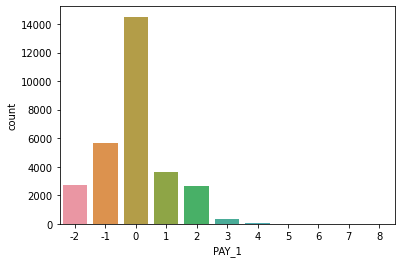

In [837]:
sns.countplot(data=ds, x="PAY_1")
plt.show()

### The variables 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6':

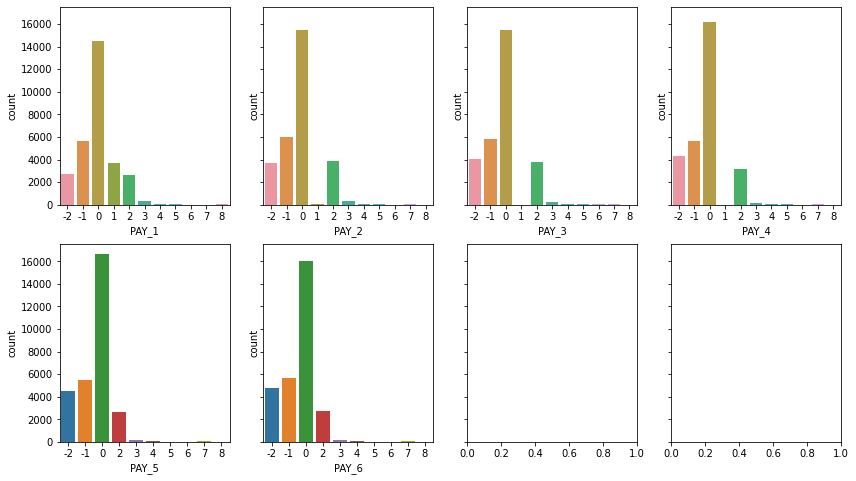

In [838]:
# From this plot we can see that most of the payments are made on time.

Pay = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

fig, ax = plt.subplots(2, 4, sharey=True, figsize=(14, 8))
for var, subplot in zip(ds[Pay], ax[:6].flatten()):
    sns.countplot(data=ds, x=var, ax=subplot)

PAY ATTENTION HERE.

From the plots above we can see some problems, the catogory -2 shouldn't exist, are 0 and 1 the same thing.  

In [839]:
for col in Pay:
  ds = ds[~ds[col].isin([-2])]

### The variables 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',  'BILL_AMT5', 'BILL_AMT6':

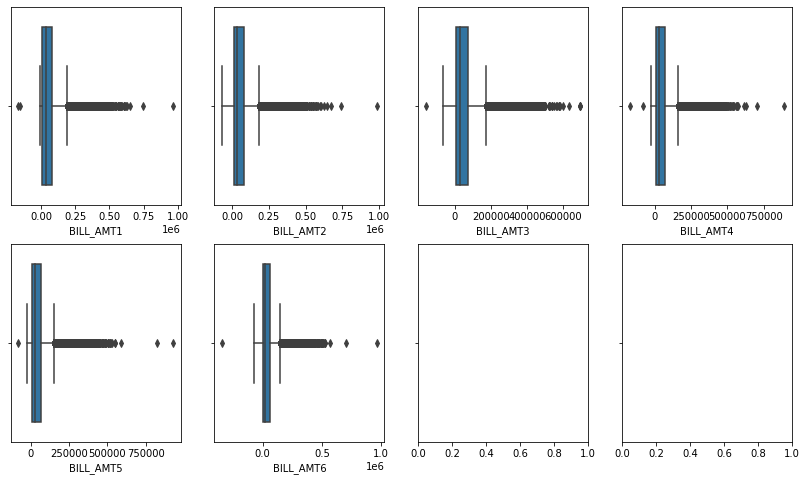

In [840]:
Bill_Amt=['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

fig, ax = plt.subplots(2, 4, sharey=True, figsize=(14, 8))
for var, subplot in zip(ds[Bill_Amt], ax.flatten()):
    sns.boxplot(data=ds, x=var, ax=subplot)

The plot above shows right skewed distributions.

### The variables 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',  'PAY_AMT5', 'PAY_AMT6':

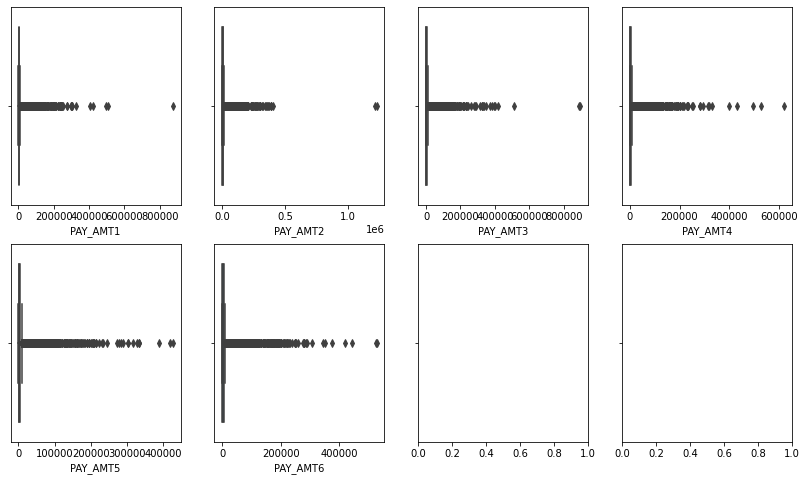

In [841]:
# Plotting the boxplots for the variables, 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'.

Pay_Amt = ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

fig, ax = plt.subplots(2, 4, sharey=True, figsize=(14, 8))
for var, subplot in zip(ds[Pay_Amt], ax.flatten()):
    sns.boxplot(data=ds, x=var, ax=subplot)

The plots above show a very right skewed distributions, we need to find a way to deal with it.

In [842]:
ds['PAY_AMT5'].min()

0.0

In [843]:
# We try to apply the log transformation to a group of variables, 
# in oder to check if the distributions are less skewed. 

#Bill_Amt=['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

ds['Log_PAY_AMT1'] = np.log1p(ds['PAY_AMT1'])
ds['Log_PAY_AMT2'] = np.log1p(ds['PAY_AMT2'])
ds['Log_PAY_AMT3'] = np.log1p(ds['PAY_AMT3'])
ds['Log_PAY_AMT4'] = np.log1p(ds['PAY_AMT4'])
ds['Log_PAY_AMT5'] = np.log1p(ds['PAY_AMT5'])
ds['Log_PAY_AMT6'] = np.log1p(ds['PAY_AMT6'])

In [844]:
# As we can see this transformation reduce the variables skew considerably.

print("The skew of the PAY_AMT1 is given by:" , ds['PAY_AMT1'].skew())
print("The skew of the Log PAY_AMT1 is given by:" , ds['Log_PAY_AMT1'].skew(), "\n")

print("The skew of the PAY_AMT2 is given by:" , ds['PAY_AMT2'].skew())
print("The skew of the Log PAY_AMT2 is given by:" , ds['Log_PAY_AMT2'].skew(), "\n")

print("The skew of the PAY_AMT3 is given by:" , ds['PAY_AMT3'].skew())
print("The skew of the Log PAY_AMT3 is given by:" , ds['Log_PAY_AMT3'].skew(), "\n")

print("The skew of the PAY_AMT4 is given by:" , ds['PAY_AMT4'].skew())
print("The skew of the Log PAY_AMT4 is given by:" , ds['Log_PAY_AMT4'].skew(), "\n")

print("The skew of the PAY_AMT5 is given by:" , ds['PAY_AMT5'].skew())
print("The skew of the Log PAY_AMT5 is given by:" , ds['Log_PAY_AMT5'].skew(), "\n")

print("The skew of the PAY_AMT6 is given by:" , ds['PAY_AMT6'].skew())
print("The skew of the Log PAY_AMT6 is given by:" , ds['Log_PAY_AMT6'].skew(), "\n")

# We can see a significan reduction in the skew of the distribution

The skew of the PAY_AMT1 is given by: 15.468767159248307
The skew of the Log PAY_AMT1 is given by: -1.8806064504727336 

The skew of the PAY_AMT2 is given by: 24.962159459852504
The skew of the Log PAY_AMT2 is given by: -1.9212651509799747 

The skew of the PAY_AMT3 is given by: 18.52916750591663
The skew of the Log PAY_AMT3 is given by: -1.7205603334123223 

The skew of the PAY_AMT4 is given by: 14.049901138358349
The skew of the Log PAY_AMT4 is given by: -1.5919139005438687 

The skew of the PAY_AMT5 is given by: 11.440572049898586
The skew of the Log PAY_AMT5 is given by: -1.510647976457176 

The skew of the PAY_AMT6 is given by: 11.500601875194553
The skew of the Log PAY_AMT6 is given by: -1.3592195208711981 



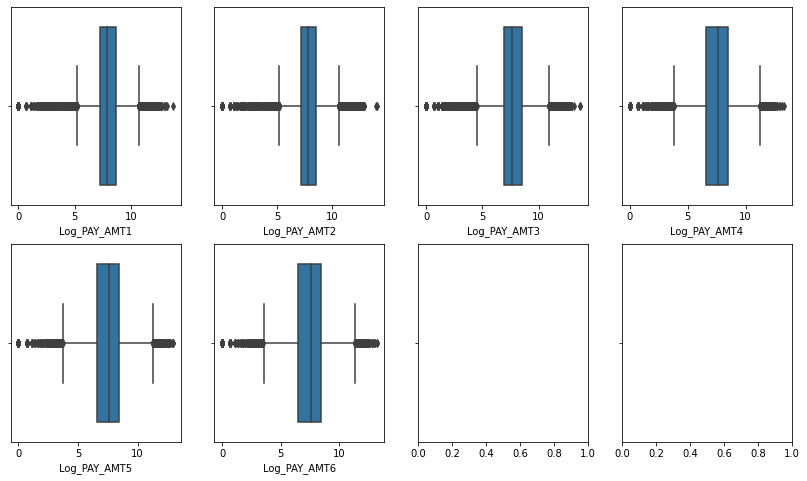

In [845]:
# Plotting some histograms.

Log_Pay_Amt = ['Log_PAY_AMT1','Log_PAY_AMT2', 'Log_PAY_AMT3', 'Log_PAY_AMT4', 'Log_PAY_AMT5', 'Log_PAY_AMT6']

fig, ax = plt.subplots(2, 4, sharey=True, figsize=(14, 8))
for var, subplot in zip(ds[Log_Pay_Amt], ax.flatten()):
    sns.boxplot(data=ds, x=var, ax=subplot)

The box plots above seems better than the ones of variables before the log transformation.

In [846]:
# We need to drop the original variables.

#ds.drop(columns=Pay_Amt, inplace=True)

In [847]:
ds.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'TARGET',
       'Log_PAY_AMT1', 'Log_PAY_AMT2', 'Log_PAY_AMT3', 'Log_PAY_AMT4',
       'Log_PAY_AMT5', 'Log_PAY_AMT6'],
      dtype='object', name=0)

### The target variable:

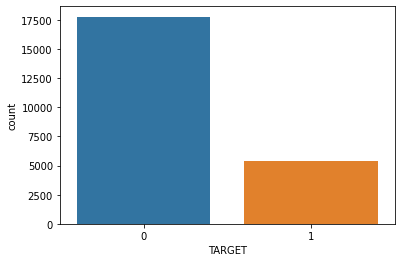

In [848]:
# Counting the 'TARGET' categories in the dataset.

sns.countplot(data=ds, x="TARGET")
plt.show()

In [849]:
ds['TARGET'].value_counts(normalize=True)

0    0.76838
1    0.23162
Name: TARGET, dtype: float64

From the above plot we can see that our target variable is unbalanced, 
with non default observations that represent 76.84% and the payment default that represent 23.16%. 

In [850]:
# THIS DOES NOT MUCH SENSE, IT DOES NOT SOUND LIKE I WANTED IT TO.
ds[['PAY_1', 'BILL_AMT1', 'BILL_AMT2', 'PAY_AMT1']].head()

,PAY_1,BILL_AMT1,BILL_AMT2,PAY_AMT1
2,-1,2682.0,1725.0,0.0
3,0,29239.0,14027.0,1518.0
4,0,46990.0,48233.0,2000.0
5,-1,8617.0,5670.0,2000.0
6,0,64400.0,57069.0,2500.0


## Correlations between numerical variables.

In [851]:
#numerical= ['ClaimNb', 'Exposure', 'LogVehPower', 'LogVehAge', 'LogDrivAge', 'LogDensity']

#corr = ds[numerical].corr()
#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)]= True

#f, ax = plt.subplots(figsize=(15, 15))
#heatmap = sns.heatmap(corr,
#                      mask = mask,
#                      square = True,
#                      linewidths = .5,
#                      #cmap = 'coolwarm',
#                      vmin = -1,
#                      vmax = 1,
#                      annot = True,
#                      annot_kws = {'size': 10})#

#add the column names as labels
#ax.set_yticklabels(corr.columns, rotation = 0)
#ax.set_xticklabels(corr.columns, rotation = 0)
#sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [852]:
ds.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'TARGET',
       'Log_PAY_AMT1', 'Log_PAY_AMT2', 'Log_PAY_AMT3', 'Log_PAY_AMT4',
       'Log_PAY_AMT5', 'Log_PAY_AMT6'],
      dtype='object', name=0)

In [853]:
# We need to check the correlation between the numerical variables.

Num_vars = ['LIMIT_BAL', 'AGE',
            'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
            'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

corr=ds.corr(method ='pearson')
corr.style.background_gradient(cmap='coolwarm')

0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,TARGET,Log_PAY_AMT1,Log_PAY_AMT2,Log_PAY_AMT3,Log_PAY_AMT4,Log_PAY_AMT5,Log_PAY_AMT6
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
LIMIT_BAL,1.000000,0.019349,-0.240076,-0.098033,0.123500,-0.231224,-0.247163,-0.243548,-0.231040,-0.215870,-0.214777,0.401205,0.395235,0.399863,0.406947,0.405660,0.395285,0.223196,0.223476,0.237088,0.226402,0.246167,0.240682,-0.173595,0.242100,0.250210,0.253487,0.246574,0.252646,0.286340
SEX,0.019349,1.000000,0.015067,-0.033269,-0.104694,-0.037745,-0.043282,-0.041053,-0.041116,-0.039703,-0.032220,-0.015881,-0.014452,-0.010495,-0.008951,-0.006127,-0.007041,-0.001638,-0.000939,-0.007381,-0.002598,-0.006190,0.000708,-0.039121,0.018164,0.026421,0.037330,0.021663,0.018058,0.043671
EDUCATION,-0.240076,0.015067,1.000000,-0.159196,0.206049,0.115261,0.108001,0.099444,0.092116,0.076419,0.069299,-0.032231,-0.035978,-0.041544,-0.054036,-0.058170,-0.054537,-0.058814,-0.059155,-0.065303,-0.056125,-0.062032,-0.063823,0.051687,-0.061343,-0.064686,-0.053312,-0.048012,-0.052637,-0.055170
MARRIAGE,-0.098033,-0.033269,-0.159196,1.000000,-0.408558,0.001482,0.000109,0.011753,0.011726,0.012230,0.015824,-0.041413,-0.039729,-0.042112,-0.040685,-0.041762,-0.038452,-0.006462,-0.004605,-0.003336,-0.010558,-0.004278,-0.007002,-0.030420,-0.001208,-0.007888,-0.011826,-0.016057,-0.013592,-0.017792
AGE,0.123500,-0.104694,0.206049,-0.408558,1.000000,-0.016738,-0.020809,-0.026326,-0.020912,-0.026311,-0.028964,0.080695,0.078205,0.078653,0.075462,0.072856,0.071029,0.026646,0.028978,0.032660,0.022073,0.023581,0.019536,0.010668,0.015776,0.029717,0.019231,0.027605,0.021610,0.032474
PAY_1,-0.231224,-0.037745,0.115261,0.001482,-0.016738,1.000000,0.712734,0.581149,0.536015,0.501426,0.460674,0.123493,0.126138,0.123303,0.122380,0.128071,0.127862,-0.092154,-0.082467,-0.079317,-0.072789,-0.061194,-0.057097,0.386348,-0.299676,-0.246915,-0.188143,-0.154495,-0.116357,-0.117158
PAY_2,-0.247163,-0.043282,0.108001,0.000109,-0.020809,0.712734,1.000000,0.678961,0.567924,0.527504,0.478521,0.101392,0.099526,0.097217,0.096819,0.103760,0.105932,-0.148406,-0.097945,-0.093931,-0.077350,-0.068484,-0.062549,0.332388,-0.533252,-0.297018,-0.217408,-0.185733,-0.134860,-0.134335
PAY_3,-0.243548,-0.041053,0.099444,0.011753,-0.026326,0.581149,0.678961,1.000000,0.696907,0.597001,0.544675,0.065607,0.087446,0.083757,0.087120,0.093674,0.096458,-0.048499,-0.133875,-0.095781,-0.080673,-0.069972,-0.067083,0.300042,-0.161543,-0.555046,-0.272257,-0.206207,-0.151989,-0.162094
PAY_4,-0.231040,-0.041116,0.092116,0.011726,-0.020912,0.536015,0.567924,0.696907,1.000000,0.750012,0.636160,0.054537,0.067860,0.088100,0.089861,0.095500,0.098917,-0.066001,-0.050524,-0.139472,-0.091346,-0.074020,-0.060838,0.282354,-0.199880,-0.181692,-0.487054,-0.246796,-0.162145,-0.154755


ATTENTION HERE.

The dataframe above show high correlation between the variables 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',	and 'BILL_AMT6'.
We decided to create a new variable out of them.

In [854]:
ds['BILL_AMT']= ds[Bill_Amt].mean(axis=1)

In [855]:
# From the dataframe above we can see high correlations, between  :


# Maybe i should check the correlations between the variables before transforming to the log, 
# this can allow us to get ride of some variables.


In [856]:
#ds.drop(columns=['BILL_AMT5'], inplace=True)

In [857]:
#corr=ds.corr(method ='pearson')
#corr.style.background_gradient(cmap='coolwarm')

In [858]:
#ds.drop(columns=['BILL_AMT4'], inplace=True)

In [859]:
#corr=ds.corr(method ='pearson')
#corr.style.background_gradient(cmap='coolwarm')

In [860]:
#ds.drop(columns=['BILL_AMT2'], inplace=True)

In [861]:
#corr=ds.corr(method ='pearson')
#corr.style.background_gradient(cmap='coolwarm')

In [862]:
#ds.drop(columns=['BILL_AMT3'], inplace=True)

In [863]:
#corr=ds.corr(method ='pearson')
#corr.style.background_gradient(cmap='coolwarm')

In [864]:
# Depending on the business understanding, we should decide to keep only one variable either 'BILL_AMT1' and 'BILL_AMT6' 

#ds.drop(columns=['BILL_AMT1'], inplace=True)

In [865]:
#corr=ds.corr(method ='pearson')
#corr.style.background_gradient(cmap='coolwarm')

In [866]:
# We drop all the PAY variables and keep only ones, 
# Dropping the PAY_AMT variables.

#ds.drop(columns=['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5'], inplace=True)
#ds.drop(columns=['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], inplace=True)

In [867]:
#corr=ds.corr(method ='pearson')
#corr.style.background_gradient(cmap='coolwarm')

# Data Preparation:

We start by dropping the variables 'Log_PAY_AMT1', 'Log_PAY_AMT2', 'Log_PAY_AMT3', 'Log_PAY_AMT4',
       'Log_PAY_AMT5' and 'Log_PAY_AMT6'.

In [868]:
ds.drop(columns= ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], inplace=True)
ds.drop(columns= ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], inplace=True)

In [869]:
# Create a modeling dataset from the original dataset
X = ds.copy(deep=True)

## Dealing with outliers:

In [870]:
#X.describe().T

In [871]:
#cols=['LIMIT_BAL', 'AGE', 'PAY_6', 'BILL_AMT6', 'Log_PAY_AMT1', 'Log_PAY_AMT2', 'Log_PAY_AMT3', 'Log_PAY_AMT4',
#'Log_PAY_AMT5', 'Log_PAY_AMT6']

In [872]:
#X = removeOutliers(X, colList=cols , lowPercentile=0.05, highPercentile=0.95, verbose=True)

## One Hot encoding the categorical variables:

In [873]:
# Transforming a list of columns to categorical.
cols = ['SEX', 'EDUCATION', 'MARRIAGE']
ds[cols] = ds[cols].apply(lambda x:x.astype('category'))

In [874]:
# Encode categorical values into dummy variables.
cols = ['SEX', 'EDUCATION', 'MARRIAGE']
ce_one_hot = ce.OneHotEncoder(cols = cols, use_cat_names=True)
X = ce_one_hot.fit_transform(X)

## Defining the target variable:

In [875]:
y = X['TARGET']
X = X.drop(columns=['TARGET'])

# Modelling:

In [876]:
# Split the dataset intro train and test sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle =True, stratify=y, random_state=2022)

In [877]:
y_train.value_counts()

0    14230
1     4290
Name: TARGET, dtype: int64

In [878]:
y_test.value_counts()

0    3558
1    1072
Name: TARGET, dtype: int64

### Logistic Regression:

In [879]:
# Initializing the model.

modelLR = linear_model.LogisticRegression(random_state=2022)

# Creating and training the model.

modelLR.fit(X_train, y_train)

# Predicting the target for X_train and X_test.

y_pred_train = modelLR.predict(X_train) 
y_pred_test = modelLR.predict(X_test) 

# Probabilities of belong to the class 1.
y_pred_proba_train = modelLR.predict_proba(X_train)[:,1] 
y_pred_proba_test = modelLR.predict_proba(X_test)[:,1] 

print(classification_report(y_pred_test, y_test))
print(confusion_matrix(y_pred_test, y_test))
print('\nAccuracy Score for modelLR: ', accuracy_score(y_pred_test, y_test))

              precision    recall  f1-score   support

           0       0.98      0.79      0.87      4419
           1       0.12      0.61      0.20       211

    accuracy                           0.78      4630
   macro avg       0.55      0.70      0.54      4630
weighted avg       0.94      0.78      0.84      4630

[[3475  944]
 [  83  128]]

Accuracy Score for modelLR:  0.7781857451403887


In [880]:
# Showing the results performance.

resultsDF = performanceMetricsDF(metrics, y_train, y_pred_proba_train, y_pred_train, y_test, y_pred_proba_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.775324,0.778186
1,PRECISION,0.578755,0.606635
2,RECALL,0.110490,0.119403
3,F1 SCORE,0.711214,0.715729
4,AUC,0.543122,0.548038
5,AUC_Proba,0.735737,0.718934


The Logistic Regression model predict most of observations to belong to class 0, meaning no default, this is a consequence of the class imbalance.
We can also remark that our model does not over fit.

### Random Forest:

In [881]:
# Initializing the model.

modelRF = RandomForestClassifier(max_depth=10, random_state=2022)

# Creating and training the model.

modelRF.fit(X_train, y_train)

# Predicting the target for X_train and X_test.

y_pred_train = modelRF.predict(X_train) 
y_pred_test = modelRF.predict(X_test) 

# Probabilities of belong to the class 1.
y_pred_proba_train = modelRF.predict_proba(X_train)[:,1] 
y_pred_proba_test = modelRF.predict_proba(X_test)[:,1] 

print(classification_report(y_pred_test, y_test))
print(confusion_matrix(y_pred_test, y_test))
print('\nAccuracy Score for modelRF: ', accuracy_score(y_pred_test, y_test))

              precision    recall  f1-score   support

           0       0.93      0.84      0.89      3927
           1       0.43      0.65      0.52       703

    accuracy                           0.81      4630
   macro avg       0.68      0.75      0.70      4630
weighted avg       0.85      0.81      0.83      4630

[[3313  614]
 [ 245  458]]

Accuracy Score for modelRF:  0.8144708423326134


In [882]:
# Showing the results performance.

resultsDF = performanceMetricsDF(metrics, y_train, y_pred_proba_train, y_pred_train, y_test, y_pred_proba_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.999946,0.814471
1,PRECISION,0.999767,0.651494
2,RECALL,1.000000,0.427239
3,F1 SCORE,0.999946,0.799759
4,AUC,0.999965,0.679190
5,AUC_Proba,1.000000,0.778065


## Imbalanced learn algorithms.

In [883]:
!pip install imblearn

### Balanced Random Forest:

In [885]:
# Initializing the model.

modelBRF = BalancedRandomForestClassifier(max_depth=10, random_state=2022)

# Creating and training the model.

modelBRF.fit(X_train, y_train)

# Predicting the target for X_train and X_test.

y_pred_train = modelBRF.predict(X_train) 
y_pred_test = modelBRF.predict(X_test) 

# Probabilities of belong to the class 1.
y_pred_proba_train = modelBRF.predict_proba(X_train)[:,1] 
y_pred_proba_test = modelBRF.predict_proba(X_test)[:,1] 

print(classification_report(y_pred_test, y_test))
print(confusion_matrix(y_pred_test, y_test))
print('\nAccuracy Score for modelBRF: ', accuracy_score(y_pred_test, y_test))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      3169
           1       0.66      0.48      0.56      1461

    accuracy                           0.76      4630
   macro avg       0.72      0.68      0.69      4630
weighted avg       0.75      0.76      0.74      4630

[[2800  369]
 [ 758  703]]

Accuracy Score for modelRF:  0.7565874730021598


In [887]:
# Showing the results performance.

resultsDF = performanceMetricsDF(metrics, y_train, y_pred_proba_train, y_pred_train, y_test, y_pred_proba_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.906965,0.756587
1,PRECISION,0.713454,0.481177
2,RECALL,1.000000,0.655784
3,F1 SCORE,0.911747,0.768240
4,AUC,0.939459,0.721371
5,AUC_Proba,0.996173,0.787378


In [77]:
%%time
#grid_param = {'n_estimators': [100, 500, 1000, 1500, 2000],
#               'max_depth': [5, 10, 20, 1000],
#               'min_samples_split': [2, 4, 8],
#               'max_features':['auto', 'sqrt'],
#               'warm_start':['False', 'True'],
#              }

#grid = GridSearchCV(brf_clf, grid_param, cv=3)
#grid.fit(X_train, y_train)
#print("Grid search best parameters: {}".format(grid.best_params_))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


### Balanced Bagging Classifier:

In [84]:
# Initializing the model.

modelBRF = BalancedRandomForestClassifier(max_depth=10, random_state=2022)

# Creating and training the model.

modelBRF.fit(X_train, y_train)

# Predicting the target for X_train and X_test.

y_pred_train = modelBRF.predict(X_train) 
y_pred_test = modelBRF.predict(X_test) 

# Probabilities of belong to the class 1.
y_pred_proba_train = modelBRF.predict_proba(X_train)[:,1] 
y_pred_proba_test = modelBRF.predict_proba(X_test)[:,1] 

print(classification_report(y_pred_test, y_test))
print(confusion_matrix(y_pred_test, y_test))
print('\nAccuracy Score for modelRF: ', accuracy_score(y_pred_test, y_test))

In [85]:
# Creating and training the model.

#bbc_clf.fit(X_train, y_train)

In [86]:
# Predicting the target for X_train and X_test.

#y_pred_train = bbc_clf.predict(X_train) 
#y_pred_test = bbc_clf.predict(X_test) 

# Probabilities of belong to the class 1.
#y_pred_proba_train = bbc_clf.predict_proba(X_train)[:,1] 
#y_pred_proba_test = bbc_clf.predict_proba(X_test)[:,1] 

In [87]:
# Showing the results performance.

#resultsDF = performanceMetricsDF(metrics, y_train, y_pred_proba_train, y_pred_train, y_test, y_pred_proba_test, y_pred_test)
#resultsDF

### Random Forest Classifier with Random Under Sampler:

In [88]:
# I am trying something new here.
# Using RandomUnderSampler.

In [89]:
rf_clf = make_pipeline(
    RandomUnderSampler(sampling_strategy='auto', replacement=False, random_state=2022),
    RandomForestClassifier(n_estimators=500, max_depth=10,
                           min_samples_split=8, random_state=2022, n_jobs=-1),
    )

In [90]:
%%time
#grid_param = {'rfc__n_estimators': [100, 500, 1000, 1500, 2000],
#          'rfc__min_samples_split': [2, 4, 8],
#          'rfc__max_features':['auto', 'sqrt'],
#          'rfc__warm_start':['False', 'True'],
#         }

#grid = GridSearchCV(rf_clf, grid_param, cv=5)
#grid.fit(X_train, y_train)
#print("Grid search best parameters: {}".format(grid.best_params_))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


In [91]:
# Here i need to use the best parameters we found previously.

In [92]:
%%time
# Creating and training the model.

rf_clf.fit(X_train, y_train)

CPU times: user 4.62 s, sys: 104 ms, total: 4.73 s
Wall time: 3.33 s


Pipeline(steps=[('randomundersampler', RandomUnderSampler(random_state=2022)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10, min_samples_split=8,
                                        n_estimators=500, n_jobs=-1,
                                        random_state=2022))])

In [93]:
# Predicting the target for X_train and X_test.

y_pred_train = rf_clf.predict(X_train) 
y_pred_test = rf_clf.predict(X_test) 

# Probabilities of belong to the class 1.
y_pred_proba_train = rf_clf.predict_proba(X_train)[:,1] 
y_pred_proba_test = rf_clf.predict_proba(X_test)[:,1] 

In [94]:
# Showing the results performance.

resultsDF = performanceMetricsDF(metrics, y_train, y_pred_proba_train, y_pred_train, y_test, y_pred_proba_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.745259,0.680417
1,PRECISION,0.477648,0.391358
2,RECALL,0.763902,0.618956
3,F1 SCORE,0.587775,0.479520
4,AUC,0.751674,0.659277
5,AUC_Proba,0.834710,0.726876


### Balanced Random Forest Classifier with Random Under Sampler:

In [95]:
brf_clf = make_pipeline(
    RandomUnderSampler(random_state=2022),
    BalancedRandomForestClassifier(n_estimators=500, random_state=2022, n_jobs=-1),
    )
# , max_depth=20

In [96]:
# Creating and training the model.

brf_clf.fit(X_train, y_train)

Pipeline(steps=[('randomundersampler', RandomUnderSampler(random_state=2022)),
                ('balancedrandomforestclassifier',
                 BalancedRandomForestClassifier(n_estimators=500, n_jobs=-1,
                                                random_state=2022))])

In [97]:
# Predicting the target for X_train and X_test.

y_pred_train = brf_clf.predict(X_train) 
y_pred_test = brf_clf.predict(X_test) 

# Probabilities of belong to the class 1.
y_pred_proba_train = brf_clf.predict_proba(X_train)[:,1] 
y_pred_proba_test = brf_clf.predict_proba(X_test)[:,1] 

In [98]:
# Showing the results performance.

resultsDF = performanceMetricsDF(metrics, y_train, y_pred_proba_train, y_pred_train, y_test, y_pred_proba_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.831533,0.673363
1,PRECISION,0.585398,0.383125
2,RECALL,0.998729,0.611863
3,F1 SCORE,0.738140,0.471202
4,AUC,0.889057,0.652209
5,AUC_Proba,0.981465,0.707495


###  Gradient Boosting Classifier with Random Under Sampler:

In [99]:
gb_clf = make_pipeline(
    RandomUnderSampler(random_state=2022),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                random_state=2022),
)
# , max_depth=20 max_depth=2,

In [100]:
# Creating and training the model.

gb_clf.fit(X_train, y_train)

Pipeline(steps=[('randomundersampler', RandomUnderSampler(random_state=2022)),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=1.0,
                                            random_state=2022))])

In [101]:
# Predicting the target for X_train and X_test.

y_pred_train = gb_clf.predict(X_train) 
y_pred_test = gb_clf.predict(X_test) 

# Probabilities of belong to the class 1.
y_pred_proba_train = gb_clf.predict_proba(X_train)[:,1] 
y_pred_proba_test = gb_clf.predict_proba(X_test)[:,1] 

In [102]:
# Showing the results performance.

resultsDF = performanceMetricsDF(metrics, y_train, y_pred_proba_train, y_pred_train, y_test, y_pred_proba_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.707260,0.610029
1,PRECISION,0.437926,0.327298
2,RECALL,0.816015,0.606061
3,F1 SCORE,0.569970,0.425051
4,AUC,0.744678,0.608664
5,AUC_Proba,0.817775,0.651248
